# Assignment on Gaussian Quadratures & Open Romberg Integration

### Question 1
Define functions corresponding to both integrands, f1 and f2. (Integrals from the Romberg Assignment)

In [32]:
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy as sc
from math import tan, cos
import numpy as np
import gauss_quad as gq

In [33]:
def f1(u):
    return ((sp.jv(3,2.7*u))**2)*u

In [34]:
def f2(u):
    return ((sp.kv(3,1.2*u))**2)*u

### Question 2
Use quad and see the cost to evaluate both integrals to an accuracy of 10−12.

In [35]:
# Cost Calculation for f1
quad_calc_f1 = sc.integrate.quad(f1,0,1,full_output=1, epsabs=1e-12, epsrel=1e-12)
num_val_f1 = quad_calc_f1[0]
print('Number of Evaluations for f1: ', quad_calc_f1[2]['neval'])
print('Numeric Value of f1 Integral: ', num_val_f1)

# Cost Calculation for f2
quad_calc_f2 = sc.integrate.quad(f2,1,np.inf,full_output=1, epsabs=1e-12, epsrel=1e-12)
num_val_f2 = quad_calc_f2[0]
print('Number of Evaluations for f2: ', quad_calc_f2[2]['neval'])
print('Numeric Value of f2 Integral: ', num_val_f2)

Number of Evaluations for f1:  21
Numeric Value of f1 Integral:  0.009969186534269647
Number of Evaluations for f2:  105
Numeric Value of f2 Integral:  3.0924507786178372


### Question 3
Use Gauss-Legendre to evaluate I1 and Gauss-Hermite to evaluate I2 .

In [36]:
x,w=gq.gauleg(0,1,7) 
val=0
for i in range(len(x)):
    val+=f1(x[i])*w[i]
print('f1 Integral Using Gauss-Legendre: ', val)
print('                           Error: ', np.abs(val-num_val_f1))

f1 Integral Using Gauss-Legendre:  0.009969186527793234
                           Error:  6.47641315576486e-12


In [37]:
def gauleg_err_calc(N):
    x,w=gq.gauleg(0,1,N) 
    val=0
    for i in range(len(x)):
        val+=f1(x[i])*w[i]
    return np.abs(val-num_val_f1)

Text(0.5, 1.0, 'Variance of Error with N for Gauss-Legendre of f1')

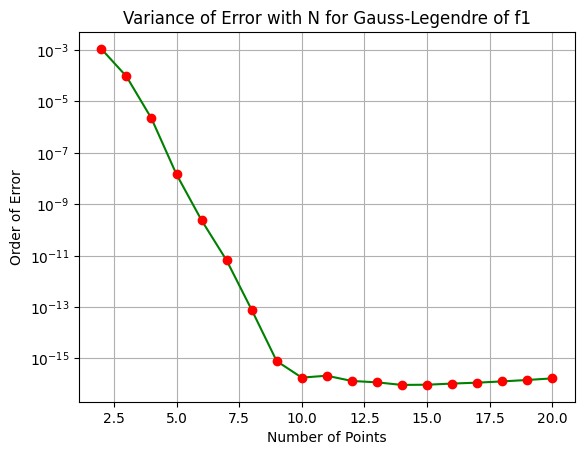

In [38]:
errs = []
ns = [N for N in range(2, 21)]

for N in ns:
    errs.append(gauleg_err_calc(N))

plt.semilogy(ns, errs,'g')
plt.semilogy(ns, errs,'ro')
plt.xlabel('Number of Points')
plt.ylabel('Order of Error')
plt.grid()
plt.title("Variance of Error with N for Gauss-Legendre of f1")

In [56]:
def f2_gaulag(z):
    return np.pi*np.exp(-2.4)*(z + 2.4)/(2*2.4**2)

In [57]:
def gaulag_err_calc(N):
    x,w=gq.gaulag(N,0.0) 
    val=0
    for i in range(len(x)):
        val+=f2_gaulag(x[i])*w[i]
    return np.abs(val-num_val_f2)

Text(0.5, 1.0, 'Variance of Error with N for Gauss-Laguerre of f2')

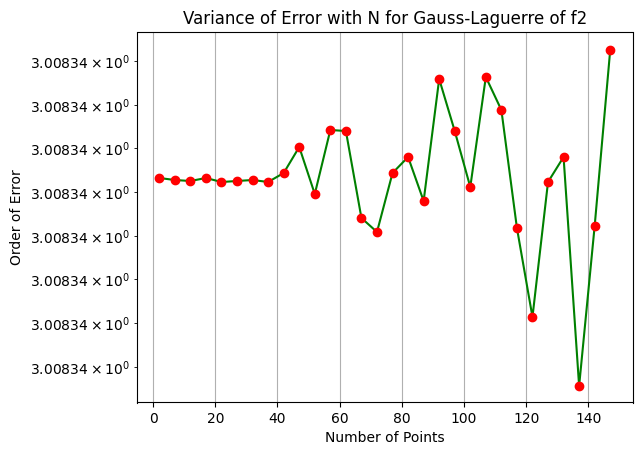

In [58]:
errs = []
ns = [N for N in range(2, 151, 5)]

for N in ns:
    errs.append(gaulag_err_calc(N))

plt.semilogy(ns, errs,'g')
plt.semilogy(ns, errs,'ro')
plt.xlabel('Number of Points')
plt.ylabel('Order of Error')
plt.grid()
plt.title("Variance of Error with N for Gauss-Laguerre of f2")

### Question 4
Use Romberg to evaluate the first integral to the required accuracy.

In [59]:
import romberg as r
romb_calc_f1=r.qromb(f1,0,1,1.e-12)
print(romb_calc_f1)

(0.009969186534269642, -1.0555978304531426e-16, 129)


### Question 5

In [60]:
def mod_f2(w):
    return ((sp.kv(3,1.2*tan(w)))**2)*tan(w)*(1/cos(w)**2)

In [61]:
import romberg as r
romb_calc_mod_f2=r.qromb(mod_f2,np.pi/4,np.pi/2,1.e-12)
print(romb_calc_mod_f2)

(3.0924507786178475, -1.5256008084042128e-14, 257)


### Question 7

In [62]:
def modified_integrand(x):
    return np.exp(-x-2)/sp.jv(1,np.sqrt(1-x**2))

### Question 8

In [63]:
def exact_integral():
    x = [np.cos(np.pi*(j - 1/2)/20) for j in range(1, 21)]
    w = [np.pi/20 for j in range(1, 21)]
    
    s = 0
    for i in range(20):
        s += modified_integrand(x[i])*w[i]
    return s

exact_val = exact_integral()

In [64]:
def gauche(N):
    x = [np.cos(np.pi*(j - 1/2)/N) for j in range(1, N + 1)]
    w = [np.pi/N for j in range(1, N + 1)]

    s = 0
    for i in range(N):
        s += modified_integrand(x[i])*w[i]
    return s

In [65]:
errors = []
for i in range(1, 20):
    errors.append(abs(gauche(i)-exact_val))

Text(0.5, 1.0, 'Variance of Error with N for Gauss-Chebyshev')

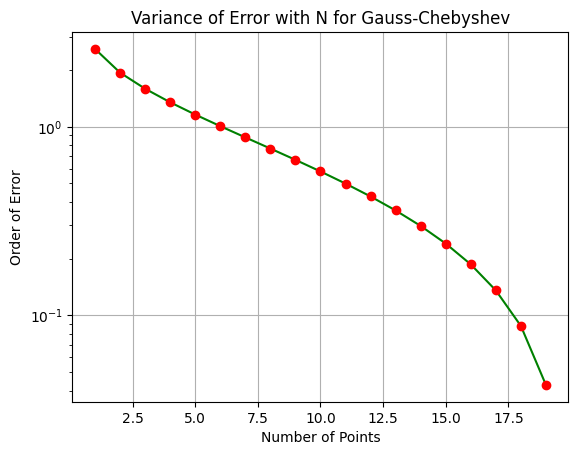

In [66]:
plt.semilogy(range(1,20),errors,'g')
plt.semilogy(range(1,20),errors,'ro')
plt.xlabel('Number of Points')
plt.ylabel('Order of Error')
plt.grid()
plt.title("Variance of Error with N for Gauss-Chebyshev")